### Esse código visa revisar e testar os principais conceitos do paper https://doi.org/10.1016/j.cpc.2021.108060

Para começar, tratemos do caso de um bulk de 4 sítios, sem dissipadores. A hamiltoniana será a do modelo XXZ, dada por
$$\hat{H} = \sum_{i = 1}^{N-1}J_i(\sigma_{i}^{x}\sigma_{i+1}^{x} + \sigma_{i}^{y}\sigma_{i+1}^{y} + \Delta_{i}\sigma_{i}^{z}\sigma_{i+1}^{z}) + \sum_{i=1}^{N}h_i\sigma_{i}^{z}$$
Com $\sigma^x = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}$, $\sigma^y = \begin{pmatrix}0 & i \\ -i & 0\end{pmatrix}$ e $\sigma^z = \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}$.


In [140]:
import matplotlib.pyplot as plt
import array_to_latex as a2l
import numpy as np

sx = np.array([[0, 1], [1, 0]], dtype = complex)
sy = np.array([[0, 1j], [-1j, 0]], dtype = complex)
sz = np.array([[1, 0], [0, -1]], dtype = complex)

Comecemos por construir a hamiltoniana.

In [141]:
N = 4

J = 1
Delta = 1.0*J
h = 0

Hx = np.kron(sx, sx)
Hy = np.kron(sy, sy)
Hz = np.kron(sz, sz)
for i in range(1, N-1):
    Hx = np.kron(Hx, sx)
    Hy = np.kron(Hy, sy)
    Hz = np.kron(Hz, sz)

H = J*(Hx + Hy + Delta*Hz)

print(H.shape)
print(H.dtype)

(16, 16)
complex128


Visualização da representação de matriz da Hamiltoniana

\begin{pmatrix}
     1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0\\
     0.0 &   -1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &   -1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &   -1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 & 

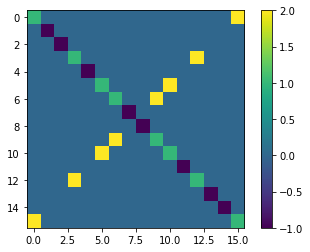

In [142]:
latex_code = a2l.to_ltx(np.round(np.real(H), 2), frmt = '{:6.1f}', arraytype = 'pmatrix', print_out=False)
print(latex_code)
plt.imshow(np.real(H))
plt.colorbar()
plt.show()

$$\begin{pmatrix}
     1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0\\
     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.2 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &   -1.2 &     0.0\\
     2.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     1.2
\end{pmatrix}$$

Diagonalização da Hamiltoniana do Bulk

In [143]:
eigvals, eigvecs = np.linalg.eigh(H)


Matriz de Densidade do estado fundamental.

\begin{pmatrix}
     0.5 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.5\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0

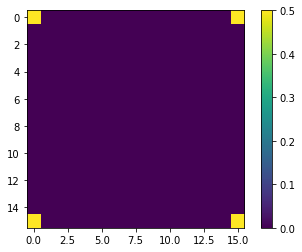

In [144]:
GS = (eigvecs[0] + 0*eigvecs[1])#/np.sqrt(2)
rho0 = np.outer(GS, GS)

latex_code = a2l.to_ltx(np.round(np.real(np.abs(rho0)), 2), frmt = '{:6.1f}', arraytype = 'pmatrix', print_out=False)
print(latex_code)

plt.imshow(np.real(rho0))
plt.colorbar()

$$\begin{pmatrix}
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.5 &     0.0 &     0.0 &     0.5 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.5 &     0.0 &     0.0 &     0.5 &     0.0\\
     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0 &     0.0
\end{pmatrix}$$

Equação de von Neumann:
$$\dfrac{d\hat{\rho}}{dt} = -i[\hat{H}, \hat{\rho}]$$

(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)
(0.9999999999999998+0j)


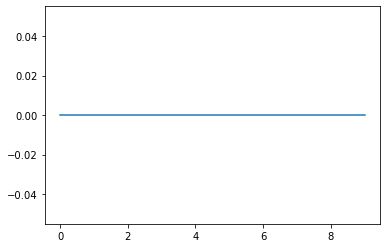

In [145]:
dt = 0.1
Nt = 10

rho = np.zeros((Nt, 16, 16),dtype = complex)

sz2 = np.kron(np.identity(2), sz)
for i in range(2):
    sz2 = np.kron(sz2, np.identity(2))


sz2mean = np.zeros(Nt, dtype = complex)
rho[0] = rho0

sz2mean[0] = np.trace(np.matmul(rho[0], sz2))
for i in range(Nt-1):
    rho[i+1] = rho[i] - 1j*(np.matmul(H, rho[i]) - np.matmul(rho[i], H))*dt
    sz2mean[i+1] = np.trace(np.matmul(rho[i+1], sz2))
    print(np.trace(rho[i+1]))

plt.plot(np.real(sz2mean))

Dissipação:
$$D_i = \gamma_i f_i\mathcal{D}[\sigma_i^{-}] + \gamma_i(1-f_i)\mathcal{D}[\sigma_{i}^{+}]$$
Com
$$\mathcal{D}[L] = L\rho L^{\dagger} - \dfrac{1}{2}\{L^{\dagger}L, \rho\}$$

In [146]:
def anticommutator(A_, B_):
    return np.matmul(A_, B_) + np.matmul(B_, A_)

def commutator(A_, B_):
    return np.matmul(A_, B_) - np.matmul(B_, A_)

def SH_Norm(A, B):
    return np.trace(np.matmul(np.conjugate(A.T), B))

def Loperator(site_, L_):
    if site_ == 0:
        Lop = L_
    else:
        Lop = np.identity(2)

    for i in range(1, N):
        if i != site_:
            Lop = np.kron(Lop, np.identity(2))
        else:
            Lop = np.kron(Lop, L_)
    return Lop
    
def calligD(rho_, site_):
    splus = (sx + 1j*sy)/2
    sminus = (sx - 1j*sy)/2

    Lminus = Loperator(site_, sminus)
    Lplus = Loperator(site_, splus)

    Dminus = np.matmul(Lminus, np.matmul(rho_, np.conjugate(Lminus.T))) - anticommutator(np.matmul(np.conjugate(Lminus.T), Lminus), rho_)
    Dplus = np.matmul(Lplus, np.matmul(rho_, np.conjugate(Lplus.T))) - anticommutator(np.matmul(np.conjugate(Lplus.T), Lplus), rho_)

    return Dminus, Dplus

def Dissipator(rho_, gamma_, f_, site_):
    Dminus, Dplus = calligD(rho_, site_)

    return gamma_*(f_*Dminus + (1-f_)*Dplus)
    



Define o Lindbladiano:
$$ \mathcal{L} = -i[\hat{H}, \hat{\rho}] + D_1(\hat{\rho}) + D_N(\hat{\rho})$$

In [147]:
def Lindbladiano(H_, rho_, gamma_, f1_, fN_):
    return -1j*commutator(H_, rho_) + Dissipator(rho_, gamma_, f1_, 0) + Dissipator(rho_, gamma_, fN_, N-1)

Evolução temporal "inocente" (naive):
$$ \dfrac{d\hat{\rho}}{dt} = \mathcal{L}(\hat{\rho})\Rightarrow \hat{\rho}(t+\Delta t)\approx \hat{\rho}(t) + \mathcal{L}(\hat{\rho})*\Delta t$$

In [148]:
def NaiveTimeEv(H_, rho0_, gamma_, f1_, fN_, dt, Nt):
    rhot_ = np.zeros((Nt, len(H_), len(H_)), dtype = complex)
    Lindblad_eigs = np.zeros((Nt, len(H_)), dtype = complex)
    rhot_[0] = rho0_
    Lindblad_eigs[0] = np.linalg.eigvals(Lindbladiano(H_, rhot_[0], gamma_, f1_, fN_))
    for i in range(Nt-1):
        rhot_[i+1] = rhot_[i] + Lindbladiano(H_, rhot_[i], gamma_, f1_, fN_)*dt
        rhot_[i+1] = rhot_[i+1]/SH_Norm(np.identity(len(rhot_[i+1])), rhot_[i+1])
        Lindblad_eigs[i+1] = np.linalg.eigvals(Lindbladiano(H_, rhot_[i], gamma_, f1_, fN_))
        #print(Lindblad_eigs[i+1, 0])


    return rhot_, Lindblad_eigs



Observáveis:
$$m_i = \langle \sigma_{i}^{z}\rangle\\
\mathcal{J}_i = 2J_i\langle \sigma_{i}^{x}\sigma_{i+1}^{y} - \sigma_{i}^{y}\sigma_{i+1}^{x}\rangle$$

O valor esperado é calculado usando
$$\langle \hat{A}\rangle = \text{Tr}(\hat{\rho}\hat{A})$$

In [ ]:
def Magnetization(rho_, site_):
    sz2 = np.kron(np.identity(2), sz)
    for i in range(2):
        sz2 = np.kron(sz2, np.identity(2))
    return sz2

def LocalCurrent(rho_, site_):
    return 1

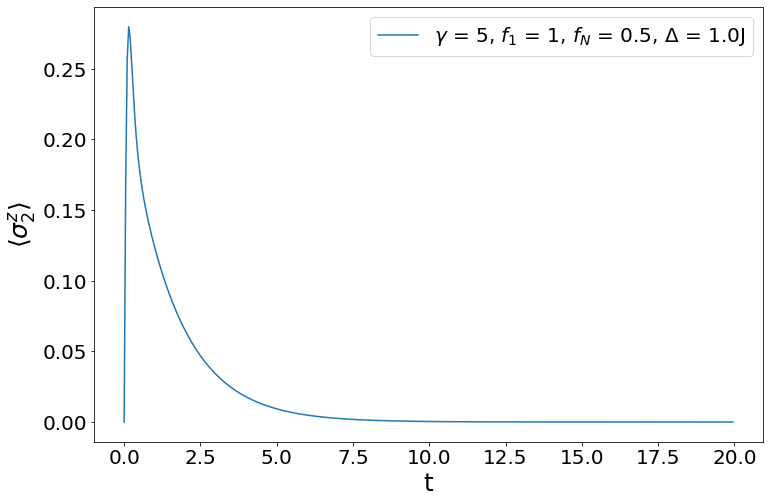

In [154]:
gamma = 5
f1 = 1
fN = 0.5

Nt = 400
dt = 0.05

t = np.arange(0, Nt*dt, dt)

rhot, Lind_eigs = NaiveTimeEv(H, rho0, gamma, f1, fN, dt, Nt)

sz2mean = np.zeros(Nt, dtype = complex)
for i in range(Nt):
    sz2mean[i] = np.trace(np.matmul(rhot[i], sz2))
    #print(np.trace(rhot[i]))


fig = plt.figure(figsize = (12, 8))
plt.plot(t, np.real(sz2mean), label = f'$\gamma$ = {gamma}, $f_1$ = {f1}, $f_N$ = {fN}, $\Delta$ = {Delta}J')
plt.ylabel(r'$\langle\sigma_{2}^{z}\rangle$', fontsize = 25)
plt.xlabel(r't', fontsize = 25)
plt.tick_params(labelsize = 20)

plt.legend(fontsize = 20)

In [150]:
from scipy.optimize import curve_fit

def ExpFit(x, a, b, c):
    return a + b*np.exp(-x/c)

6.807143542820097e-10


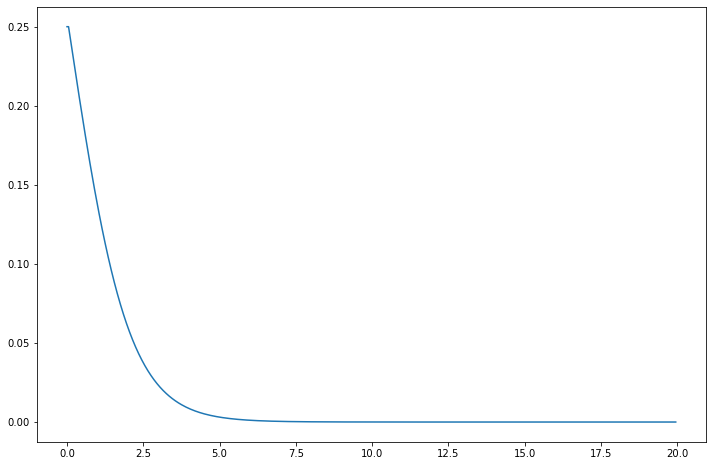

In [151]:
fig = plt.figure(figsize = (12, 8))
plt.plot(t, np.real(np.max(Lind_eigs[:], axis = 1)))
print(np.real(np.max(Lind_eigs[-1])))

1.3366820244959106


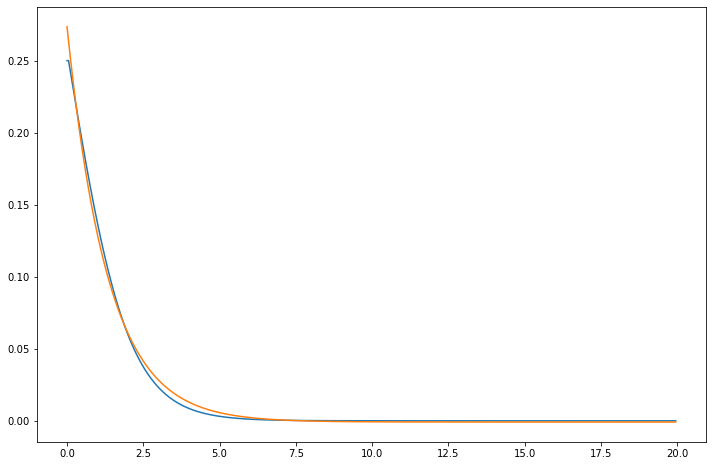

In [152]:
params, _ = curve_fit(ExpFit, t, np.real(np.max(Lind_eigs[:], axis = 1)))

print(params[2])
fig = plt.figure(figsize = (12, 8))
plt.plot(t, np.real(np.max(Lind_eigs[:], axis = 1)))
plt.plot(t, params[0] + params[1]*np.exp(-t/params[2]))